In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools

In [2]:
train_df=pd.read_csv("train_submissions.csv")
print(train_df.head())
print("\n Shape of train data: "+str(train_df.shape))
print("\n Null count: \n"+str(train_df.isnull().sum()))

     user_id problem_id  attempts_range
0   user_232  prob_6507               1
1  user_3568  prob_2994               3
2  user_1600  prob_5071               1
3  user_2256   prob_703               1
4  user_2321   prob_356               1

 Shape of train data: (155295, 3)

 Null count: 
user_id           0
problem_id        0
attempts_range    0
dtype: int64


In [3]:
test_df=pd.read_csv("test_submissions.csv")
print(test_df.head())
print("\n Shape of test data: "+str(test_df.shape))
print("\n Null count: \n"+str(test_df.isnull().sum()))

                    ID    user_id problem_id
0   user_856_prob_5822   user_856  prob_5822
1  user_2642_prob_2334  user_2642  prob_2334
2  user_2557_prob_2920  user_2557  prob_2920
3  user_1572_prob_4598  user_1572  prob_4598
4   user_295_prob_6139   user_295  prob_6139

 Shape of test data: (66555, 3)

 Null count: 
ID            0
user_id       0
problem_id    0
dtype: int64


In [4]:
problem_data_df=pd.read_csv("problem_data.csv")
print(problem_data_df.head())
print("\n Shape of problem data: "+str(problem_data_df.shape))
print("\n Null count: \n"+str(problem_data_df.isnull().sum()))

  problem_id level_type  points                                 tags
0  prob_3649          H     NaN                                  NaN
1  prob_6191          A     NaN                                  NaN
2  prob_2020          F     NaN                                  NaN
3   prob_313          A   500.0                greedy,implementation
4   prob_101          A   500.0  constructive algorithms,greedy,math

 Shape of problem data: (6544, 4)

 Null count: 
problem_id       0
level_type     133
points        3917
tags          3484
dtype: int64


In [5]:
user_data_df=pd.read_csv("user_data.csv")
print(user_data_df.head())
print("\n Shape of user data: "+str(user_data_df.shape))
print("\n Null count: \n"+str(user_data_df.isnull().sum()))

     user_id  submission_count  problem_solved  contribution  country  \
0  user_3311                47              40             0      NaN   
1  user_3028                63              52             0    India   
2  user_2268               226             203            -8    Egypt   
3   user_480               611             490             1  Ukraine   
4   user_650               504             479            12   Russia   

   follower_count  last_online_time_seconds  max_rating   rating  \
0               4                1504111645     348.337  330.849   
1              17                1498998165     405.677  339.450   
2              24                1505566052     307.339  284.404   
3              94                1505257499     525.803  471.330   
4               4                1496613433     548.739  486.525   

           rank  registration_time_seconds  
0  intermediate                 1466686436  
1  intermediate                 1441893325  
2      beginner  

# Exploratory Data Analysis

## Problem Data

In [6]:
len(problem_data_df['problem_id'].unique())

6544

In [7]:
len(problem_data_df['level_type'].unique())

15

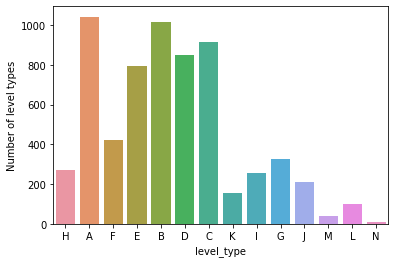

In [8]:
ax = sns.countplot(problem_data_df['level_type'])
ax.set(ylabel='Number of level types')
plt.show()

In [9]:
len(problem_data_df['points'].unique())

31

In [10]:
problem_data_df['points'].max()

5000.0

In [11]:
problem_data_df['points'].min()

-1.0

In [12]:
len(problem_data_df['tags'].unique())

883

In [13]:
problem_data_df[problem_data_df['points']==-1.0]['tags']

554    NaN
Name: tags, dtype: object

In [14]:
problem_data_df[problem_data_df['points']==5000.0]['tags']

644    binary search,graphs
Name: tags, dtype: object

In [15]:
problem_data_df[problem_data_df['tags'].isnull()]['points'].isnull().all()

False

In [16]:
problem_data_df[problem_data_df['points'].isnull()]['tags'].isnull().all()

False

In [17]:
problem_data_df[problem_data_df['points'].isnull()]['level_type'].isnull().all()

False

In [18]:
problem_data_df[problem_data_df['tags'].isnull()]['level_type'].isnull().all()

False

In [19]:
problem_data_df[problem_data_df['points'].isnull()]['tags'].isnull().sum()

3403

### Observation:

- If points is NaN then tag is also not NaN always and vice versa
- 3403 problems where both are NaN 

In [20]:
def encode_tags(df):
    df['tags'].fillna("UNKNOWN",inplace=True)
    df['tags_test'] = df['tags'].apply(lambda x: [str(i) for i in x.split(',')])
    tag_list = df["tags_test"].tolist()
    
    merged = list(itertools.chain(*tag_list))
    unique_tags_list=list(set(merged))
    
    for i in range(len(unique_tags_list)):
        df[unique_tags_list[i]+"_tag"]=0
    
    for index, row in df.iterrows():
        for j in range(len(row["tags_test"])):
            df.loc[index, row["tags_test"][j]+"_tag"] = 1
            
    df.drop(["tags_test"],inplace=True,axis=1)
    
    return df
    

In [21]:
problem_data_df=encode_tags(problem_data_df)

In [22]:
problem_data_df.head()

,problem_id,level_type,points,tags,constructive algorithms_tag,math_tag,binary search_tag,combinatorics_tag,brute force_tag,geometry_tag,...,matrices_tag,dfs and similar_tag,graph matchings_tag,games_tag,data structures_tag,graphs_tag,number theory_tag,2-sat_tag,sortings_tag,meet-in-the-middle_tag
0,prob_3649,H,NaN,UNKNOWN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,prob_6191,A,NaN,UNKNOWN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,prob_2020,F,NaN,UNKNOWN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,prob_313,A,500.0,"greedy,implementation",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,prob_101,A,500.0,"constructive algorithms,greedy,math",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
problem_data_df.groupby(['level_type'])['points'].max()

level_type
A    3000.0
B    3000.0
C    3000.0
D    3000.0
E    5000.0
F    3500.0
G    3500.0
H    3500.0
I       NaN
J       NaN
K       NaN
L       NaN
M       NaN
N       NaN
Name: points, dtype: float64

In [24]:
problem_data_df.groupby(['level_type'])['points'].min()

level_type
A       3.0
B      -1.0
C       8.0
D     500.0
E     500.0
F     500.0
G     500.0
H    1500.0
I       NaN
J       NaN
K       NaN
L       NaN
M       NaN
N       NaN
Name: points, dtype: float64

In [25]:
problem_data_df['points'].isnull().sum()

3917

In [26]:
problem_data_df['points'] = np.where(~problem_data_df['level_type'].isin(['I','J','K','L','M','N']), problem_data_df['points'], 0)

In [27]:
problem_data_df['points'].isnull().sum()

3146

In [28]:
problem_data_df['points'] = problem_data_df.groupby(['level_type'])['points'].apply(lambda x: x.fillna(x.mean()))

In [29]:
problem_data_df[problem_data_df['points'].isnull()].head()

,problem_id,level_type,points,tags,constructive algorithms_tag,math_tag,binary search_tag,combinatorics_tag,brute force_tag,geometry_tag,...,matrices_tag,dfs and similar_tag,graph matchings_tag,games_tag,data structures_tag,graphs_tag,number theory_tag,2-sat_tag,sortings_tag,meet-in-the-middle_tag
28,prob_3284,NaN,NaN,UNKNOWN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,prob_4968,NaN,NaN,UNKNOWN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,prob_704,NaN,NaN,UNKNOWN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,prob_145,NaN,NaN,UNKNOWN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,prob_4785,NaN,NaN,dp,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
problem_data_df.isnull().sum()

problem_id                         0
level_type                       133
points                           133
tags                               0
constructive algorithms_tag        0
math_tag                           0
binary search_tag                  0
combinatorics_tag                  0
brute force_tag                    0
geometry_tag                       0
expression parsing_tag             0
hashing_tag                        0
UNKNOWN_tag                        0
shortest paths_tag                 0
trees_tag                          0
strings_tag                        0
probabilities_tag                  0
fft_tag                            0
ternary search_tag                 0
greedy_tag                         0
string suffix structures_tag       0
implementation_tag                 0
bitmasks_tag                       0
flows_tag                          0
divide and conquer_tag             0
chinese remainder theorem_tag      0
*special_tag                       0
d

In [31]:
problem_data_df['level_type'].fillna('unknown',inplace=True)
problem_data_df['points'].fillna(0,inplace=True)

In [32]:
problem_data_df.isnull().sum()

problem_id                       0
level_type                       0
points                           0
tags                             0
constructive algorithms_tag      0
math_tag                         0
binary search_tag                0
combinatorics_tag                0
brute force_tag                  0
geometry_tag                     0
expression parsing_tag           0
hashing_tag                      0
UNKNOWN_tag                      0
shortest paths_tag               0
trees_tag                        0
strings_tag                      0
probabilities_tag                0
fft_tag                          0
ternary search_tag               0
greedy_tag                       0
string suffix structures_tag     0
implementation_tag               0
bitmasks_tag                     0
flows_tag                        0
divide and conquer_tag           0
chinese remainder theorem_tag    0
*special_tag                     0
dp_tag                           0
two pointers_tag    

### Observation

- Level_type "I","J","K","L","M","N" have always null "points" values, might be of 0 points level_type categories
- other level types are filled with mean value of points of their group
- some level_types are null-- filling with uknown values
- points with level_type other than  "I","J","K","L","M","N" are filled with 0

## User Data

In [33]:
len(user_data_df['user_id'].unique())

3571

In [34]:
user_data_df.corr()

,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,registration_time_seconds
submission_count,1.000000,0.997825,0.431340,0.334935,0.293030,0.614162,0.552230,-0.506054
problem_solved,0.997825,1.000000,0.430580,0.336507,0.283622,0.614294,0.555153,-0.493901
contribution,0.431340,0.430580,1.000000,0.470153,0.121975,0.521726,0.456144,-0.353944
follower_count,0.334935,0.336507,0.470153,1.000000,0.092050,0.384030,0.331115,-0.266413
last_online_time_seconds,0.293030,0.283622,0.121975,0.092050,1.000000,0.211763,0.182762,-0.095490
max_rating,0.614162,0.614294,0.521726,0.384030,0.211763,1.000000,0.930799,-0.575060
rating,0.552230,0.555153,0.456144,0.331115,0.182762,0.930799,1.000000,-0.484886
registration_time_seconds,-0.506054,-0.493901,-0.353944,-0.266413,-0.095490,-0.575060,-0.484886,1.000000


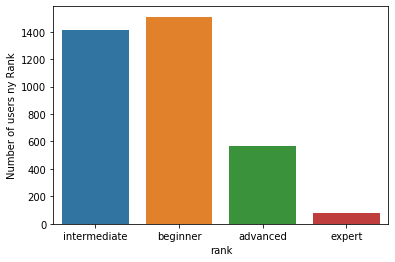

In [35]:
ax = sns.countplot(user_data_df['rank'])
ax.set(ylabel='Number of users ny Rank')
plt.show()

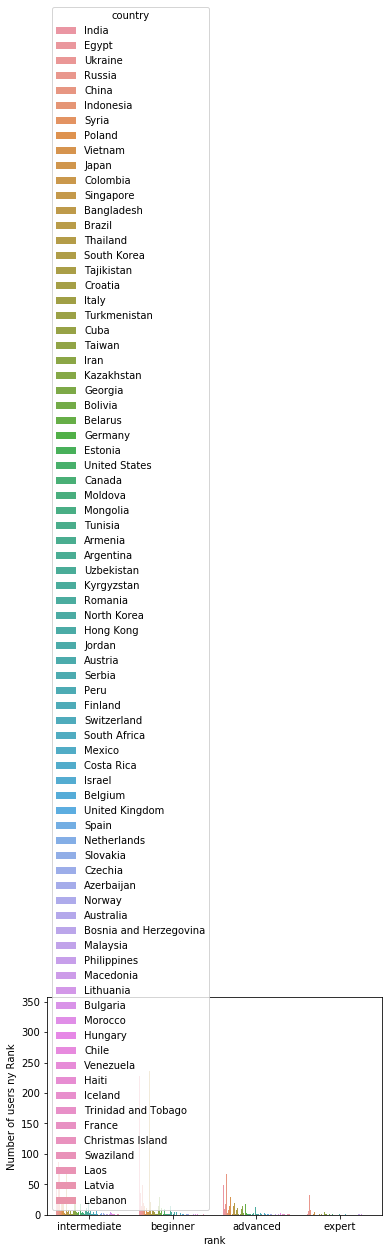

In [36]:
ax=sns.countplot(x=user_data_df['rank'], hue=user_data_df['country'], data=pd.melt(user_data_df))
ax.set(ylabel='Number of users ny Rank')
plt.show()

In [37]:
user_data_df['conversion_rate']=user_data_df['problem_solved']/user_data_df['submission_count']

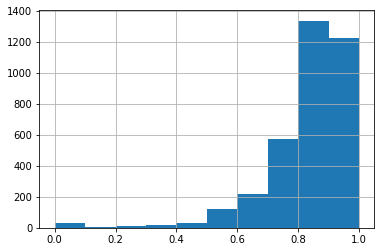

In [38]:
user_data_df['conversion_rate'].hist()

In [39]:
user_data_df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,conversion_rate
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,0.851064
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325,0.825397
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603,0.898230
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417,0.801964
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498,0.950397


In [40]:
user_data_df['last_online_time_date'] = pd.to_datetime(user_data_df['last_online_time_seconds'],unit='s')
user_data_df['registration_time_date'] = pd.to_datetime(user_data_df['registration_time_seconds'],unit='s')

In [41]:
user_data_df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,conversion_rate,last_online_time_date,registration_time_date
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,0.851064,2017-08-30 16:47:25,2016-06-23 12:53:56
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325,0.825397,2017-07-02 12:22:45,2015-09-10 13:55:25
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603,0.898230,2017-09-16 12:47:32,2016-01-31 19:13:23
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417,0.801964,2017-09-12 23:04:59,2012-10-20 08:06:57
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498,0.950397,2017-06-04 21:57:13,2014-03-23 07:41:38


In [42]:
user_data_df['days_active']=round((user_data_df['last_online_time_seconds']-user_data_df['registration_time_seconds'])/(60*60*24))

In [43]:
user_data_df['country'].fillna('unknown',inplace=True)

In [44]:
user_data_df.isnull().sum()

user_id                      0
submission_count             0
problem_solved               0
contribution                 0
country                      0
follower_count               0
last_online_time_seconds     0
max_rating                   0
rating                       0
rank                         0
registration_time_seconds    0
conversion_rate              0
last_online_time_date        0
registration_time_date       0
days_active                  0
dtype: int64

## Train Data

In [45]:
train_df.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [46]:
len(train_df['user_id'].unique())

3529

In [47]:
len(train_df['problem_id'].unique())

5776

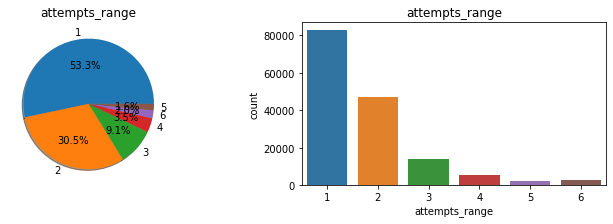

In [48]:
f,ax=plt.subplots(1,2,figsize=(12,3))
train_df['attempts_range'].value_counts().plot.pie(explode=[0,0,0,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('attempts_range')
ax[0].set_ylabel('')
sns.countplot('attempts_range',data=train_df,ax=ax[1])
ax[1].set_title('attempts_range')
plt.show()

In [49]:
train_df.groupby("user_id")['problem_id'].count().sort_values(ascending=True)

user_id
user_1888      1
user_451       1
user_3306      1
user_2366      1
user_102       1
            ... 
user_1232    102
user_2744    104
user_734     104
user_1009    105
user_28      105
Name: problem_id, Length: 3529, dtype: int64

### Observation

- Some users worked on more than 1 problem

## Test Data

In [50]:
test_df.head()

,ID,user_id,problem_id
0,user_856_prob_5822,user_856,prob_5822
1,user_2642_prob_2334,user_2642,prob_2334
2,user_2557_prob_2920,user_2557,prob_2920
3,user_1572_prob_4598,user_1572,prob_4598
4,user_295_prob_6139,user_295,prob_6139
